In [ ]:
import networkx as nx 
import random
import matplotlib.pyplot as plt
import numpy as np 
import math 
import copy 
import graphviz
from scipy.optimize import fsolve
from typing import List
import sympy as sp
from sympy import Symbol
from collections import deque
import pickle
import import_ipynb
from arrival_networkx import Arrival

In [ ]:
a.save_graph(f'./instances/{a.n}_nodes.gpickle')

# ITERATION METHOD

In [ ]:
def is_converged(x_new, x_old, tol=0):
    """
    Component-wise check.
    """
    return np.max(np.abs(x_new - x_old)) <= tol

In [ ]:

def calculate_fixed_point(f, x0, max_iterations=1000, tol=0):
    """
    Calculate the fixed point of the monotone function f using iteration.
    """
    x_old = x0.copy()
    
    for i in range(max_iterations):
        x_new = f(x_old)
        ### both x[0] (sink node count) and x[-1] (target node count) cannot be > 0 at the same time,
        ### since our graph contruction that if a node has path to target node, it will 
        ### be in reachable_nodes and not point to sink node. 
        print(f"iteration {i} : {x_new}")
        if x_new[0] > 0:
            return False
        if x_new[-1] > 0:
            return True
        ### CHANGES MADE : if X-1 becomes >= 1, that means -1 would be visited and since the 
        ###                 function is monotone X-1 would not decrease so we can stop there and 
        ###                 conclude on the ARRIVAL problem early.
        ###                 This is true because each iteration is a run profile, 
        
        ### WHat type of bound can we expect on this method
        
        # if is_converged(x_new, x_old, tol):
        #     return x_new
        
        x_old = x_new
    
    raise Exception("Fixed point calculation did not converge within the maximum iterations.")


In [ ]:
example = Arrival(10)
example.save_graph('example.gpickle')

In [ ]:
# Define the initial guess for the fixed point calculation
n = 1000
game = Arrival(n)
# print(len(game.equations))
x0 = np.zeros(game.n)
x0[1] = 1


In [ ]:
game.run_procedure()

In [ ]:
game.graph.edges

In [ ]:

# Calculate the fixed point
fixed_point = calculate_fixed_point(game.evaluate, x0)

print("Fixed point:", fixed_point)

# DANGQIYE METHOD

In [ ]:
game.graph.edges 

## "hard" problem 1

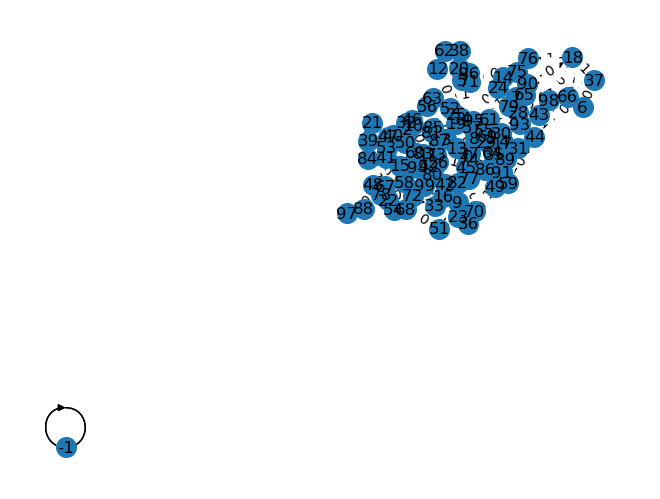

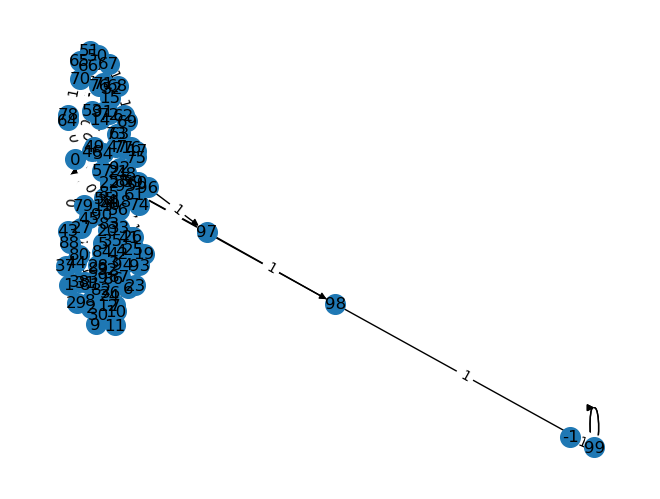

In [ ]:
def get_hard_instance1(m:int,n:int):
    game = Arrival(m+n)
    
    game.s_0[0] = 1 
    game.s_1[0] = m
    
    for v in range(1,m-1):
        game.s_0[v] = 0
        game.s_1[v] = v+1 
        
    game.s_0[m-1] = 0 
    game.s_1[m-1] = 0
        
    for v in range(m,m+n-1):
        game.s_0[v] = 0
        game.s_1[v] = v+1 
        
    game.s_0[m+n-1] =m+n-1
    game.s_1[m+n-1] =m+n-1
    
    game.s_0 = game.s_0[:-1]
    game.s_1 = game.s_1[:-1]
    game.n = m+n
    
    game.graph = game.get_network_graph()
    game.draw_graph(game.graph)
    
    return game

m = 50
n = 50
hard1 = get_hard_instance1(m,n)

In [ ]:
hard1.save_graph(f'./instances/hard_{m}_{n}.gpickle')


(process:23080): GLib-GIO-WARNING **: 00:53:28.078: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2023.1101.300_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 1 extensions but has no verbs

(process:23080): GLib-GIO-WARNING **: 00:53:28.210: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2312.33.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:23080): GLib-GIO-WARNING **: 00:53:28.234: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.9.1.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs


In [ ]:
def get_hard_instance2(m:int,n:int):
    game = Arrival(m+n)
    
    r = random.random()
    game.s_0[0] = 1 if r > 0.5 else m
    game.s_1[0] = 1 if r <= 0.5 else m
    
    for v in range(1,m):
        r = random.random()
        game.s_0[v] = v+1 if r > 0.5 else 0
        game.s_1[v] = v+1 if r <= 0.5 else 0
        
    for v in range(m,m+n):
        r = random.random()
        game.s_0[v] = v+1 if r > 0.5 else 0
        game.s_1[v] = v+1 if r <= 0.5 else 0
    
    game.s_0 = game.s_0[:-1]
    game.s_1 = game.s_1[:-1]
    game.n = m+n
    
    game.graph = game.get_network_graph()
    game.draw_graph(game.graph)
    
    return game

m = 5
n = 5
hard1 = get_hard_instance1(m,n)